In [1]:
import os
import numpy as np
import yaml
import matplotlib.pyplot as plt
import cuvis
from cuvis_ai.preprocessor import PCA, NMF
from cuvis_ai.pipeline import Graph
from cuvis_ai.unsupervised import KMeans
import networkx as nx
%matplotlib inline

In [2]:
graph = Graph('tomato_net')

In [3]:
# Load a sample image
data = cuvis.SessionFile('/home/nathaniel/Downloads/20230809_140605_X20_28_b_000.cu3s').get_measurement(0)
sample_cube = data.data.get('cube').array

In [4]:
# Stage 1 - Dimensionality Reduction
pca_stage = PCA(n_components=100)
pca_stage.fit(sample_cube)
out = pca_stage.forward(sample_cube)

In [5]:
# Stage 2 - Dimensionality Reduction (Redundanct, but included for example)
pca_stage2 = PCA(n_components=10)
pca_stage2.fit(out)
out2 = pca_stage2.forward(out)

In [6]:
# Stage 3 - Upsupervised classification
kmeans_stage = KMeans(n_clusters=4)
kmeans_stage.fit(out2)

In [7]:
# Stage 4 - Upsupervised classification on higher dim data
kmeans_stage2 = KMeans(n_clusters=4)
kmeans_stage2.fit(out)

In [8]:
graph.add_base_node(pca_stage)

In [9]:
graph.add_edge(pca_stage, pca_stage2)

In [10]:
graph.add_edge(pca_stage2, kmeans_stage)

In [11]:
graph.add_edge(pca_stage, kmeans_stage2)

In [12]:
out = graph.forward(sample_cube)

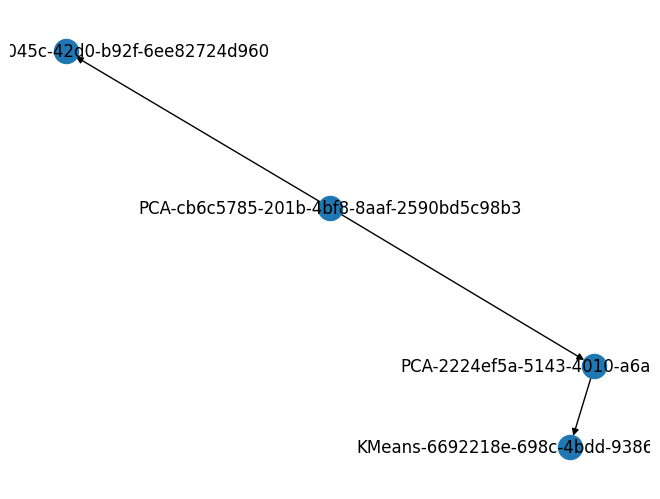

In [13]:
nx.draw(graph.graph, with_labels = True)

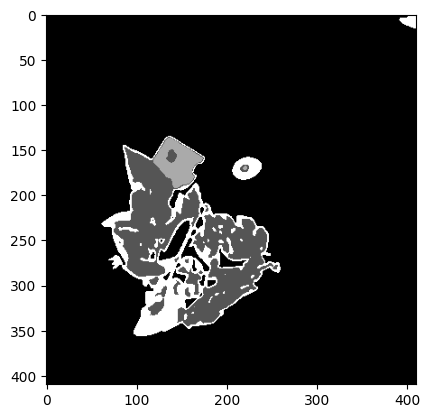

In [14]:
plt.figure()
plt.imshow(list(out.values())[-1], cmap='grey')
plt.show()

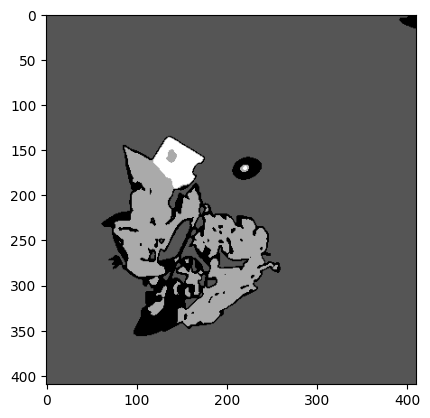

In [17]:
plt.figure()
plt.imshow(list(out.values())[-2], cmap='grey')
plt.show()

In [18]:
graph.serialize()

Project saved to ~/tomato_net_2024_04_15_15_11_11.zip


In [19]:
graphs_load = Graph('tomato_test_3')

In [20]:
graphs_load.load('/home/nathaniel/tomato_net_2024_04_15_15_11_11.zip')

In [21]:
out2 = graphs_load.forward(sample_cube)

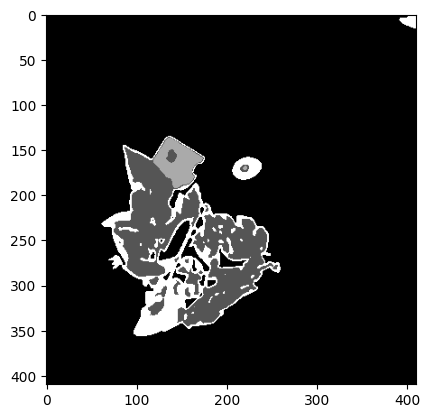

In [22]:
plt.figure()
plt.imshow(list(out2.values())[-1], cmap='grey')
plt.show()

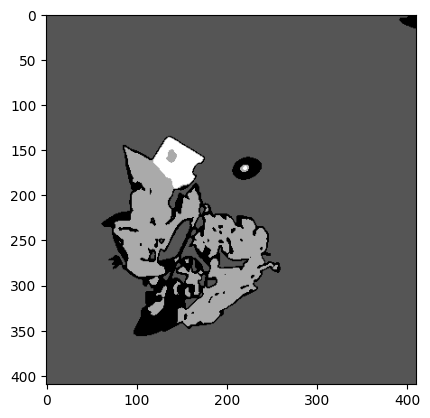

In [23]:
plt.figure()
plt.imshow(list(out2.values())[-2], cmap='grey')
plt.show()